## Paso 1: Carga del conjunto de datos

In [34]:
import pandas as pd

# Cargar el dataset completo
dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv', sep=',')

dataframe

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct   
0      1001    55601   6787               12.206615    7637  \
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39   
0                    13.735364   6878                 12.370281   7089  \
1                    12.344167  23579                 10.814964  25213   
2                    11.896628   3268                 13.134520   3201   
3                    11.589286   3029                 13.522321   3113   
4                    13.087828   6742                 11.656293   6884   
...                        ...    ...                       ...    ...   
3135                 14.694200   5359                 12.448027   6577   
3136                  9.466661   2967                 12.854729   4093   
3137                 15.788955   2153                 10.606434   2702   
3138                 14.115409    715                  9.067850    903   
3139                 11.181283    681                  9.774652    906   

      30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence   
0                    12.749771  ...         3644                 12.9  \
1                    11.564429  ...        14692                 12.0   
2                    12.865239  ...         2373                 19.7   
3                    13.897321  ...         1789                 14.1   
4                    11.901798  ...         4661                 13.5   
...                        ...  ...          ...                  ...   
3135                 15.277229  ...         2098                  8.9   
3136                 17.733200  ...          928                  7.2   
3137                 13.311001  ...         1163                 10.4   
3138                 11.452124  ...          506                 11.3   
3139                 13.004162  ...          480                 11.7   

      diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number   
0                      11.9                   13.8             5462  \
1                      11.0                   13.1            20520   
2                      18.6                   20.6             3870   
3                      13.2                   14.9             2511   
4                      12.6                   14.5             6017   
...                     ...                    ...              ...   
3135                    8.3                    9.6             2834   
3136                    6.5                    8.0             1360   
3137                    9.5                   11.2             1500   
3138                   10.3                   12.1              686   
3139                   10.7                   12.7              644   

      CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number   
0                3.1               2.9               3.3        1326  \
1                3.2               3.0               3.5        5479   
2                4.5               4.2               4.8         887   
3                3.3               3.1               3.6         595   
4                3.4               3.2               3.7        1507   
...              ...               ...               ...         ...   
3135             2.6               2.4               2.8         821   
3136             2.4               2.2               2.

- CONCLUSIÓN

Mi dataset tiene 108 variables. Son muchas. Me quedo con el 30% de las predictoras usando el dataset de TRAIN. Si tenía 108, me quedo con 36

In [35]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes


In [36]:
# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

['COUNTY_NAME', 'STATE_NAME']
['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18

- CONCLUSIÓN

Dividimos en categoricas y numericas para tener un conocimiento de lo que vamos a entrenar mas adelante.

In [37]:
# Eliminar las columnas categóricas para que solo queden las numéricas
num_variables = numeric_columns

num_variables

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [38]:
# Aplicar el StandardScaler a las variables numéricas

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_features = scaler.fit_transform(dataframe[num_variables])

# Crear un nuevo DataFrame con las variables numéricas escaladas
dataframe_norm = pd.DataFrame(norm_features, index=dataframe.index, columns=num_variables)

dataframe_norm

fips   TOT_POP       0-9  0-9 y/o % of total pop    19-Oct   
0    -1.940874 -0.145679 -0.142421                0.158006 -0.135556  \
1    -1.940742  0.341296  0.287476               -0.242861  0.320383   
2    -1.940610 -0.237785 -0.239429               -0.419441 -0.246181   
3    -1.940478 -0.245223 -0.246032               -0.426966 -0.254791   
4    -1.940346 -0.138966 -0.135053                0.186249 -0.137140   
...        ...       ...       ...                     ...       ...   
3135  1.692310 -0.183307 -0.158761                1.086516 -0.166565   
3136  1.692442 -0.243182 -0.247755               -0.726175 -0.264513   
3137  1.692574 -0.251523 -0.230123                1.649960 -0.240386   
3138  1.692706 -0.288743 -0.284261               -0.465984 -0.289869   
3139  1.692838 -0.291495 -0.286127               -0.318030 -0.297769   

      10-19 y/o % of total pop     20-29  20-29 y/o % of total pop     30-39   
0                     0.573496 -0.153144                  0.027610 -0.139384  \
1                    -0.193107  0.183774                 -0.469965  0.230620   
2                    -0.439718 -0.225971                  0.272104 -0.218759   
3                    -0.609076 -0.230792                  0.396168 -0.220555   
4                     0.216679 -0.155888                 -0.200808 -0.143570   
...                        ...       ...                       ...       ...   
3135                  1.101851 -0.183788                  0.052482 -0.149837   
3136                 -1.778724 -0.232043                  0.182593 -0.200548   
3137                  1.705104 -0.248464                 -0.536677 -0.228946   
3138                  0.782915 -0.277474                 -1.028898 -0.265673   
3139                 -0.833901 -0.278160                 -0.802779 -0.265612   

      30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence   
0                     0.588469  ...    -0.138900            -0.063696  \
1                    -0.110300  ...     0.563986            -0.394103   
2                     0.656538  ...    -0.219763             2.432709   
3                     1.264959  ...    -0.256918             0.376846   
4                     0.088582  ...    -0.074198             0.156575   
...                        ...  ...          ...                  ...   
3135                  2.078427  ...    -0.237259            -1.532170   
3136                  3.526243  ...    -0.311695            -2.156271   
3137                  0.919318  ...    -0.296744            -0.981492   
3138                 -0.176505  ...    -0.338543            -0.651086   
3139                  0.738435  ...    -0.340198            -0.504238   

      diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number   
0                 -0.071720              -0.089834        -0.129902  \
1                 -0.414900              -0.337677         0.376251   
2                  2.483064               2.317776        -0.183415   
3                  0.423984               0.299632        -0.229096   
4                  0.195197               0.158008        -0.111247   
...                     ...                    ...              ...   
3135              -1.444440              -1.576887        -0.218239   
3136              -2.130800              -2.143384        -0.267785   
3137              -0.986867              -1.010391        -0.263079   
3138              -0.681818              -0.691737        -0.290441   
3139              -0.529294              -0.479301        -0.291853   

      CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number   
0          -0.609615         -0.582796         -0.669652   -0.147523  \
1          -0.433549         -0.393279         -0.343373    0.389791   
2           1.855312          1.880929          1.777443   -0.204321   
3          -0.257483         -0.203761         -0.180233   -0.242100   
4          -0.081417         -0.014244         -0.017093   -0.124105   
...              ...  

In [39]:
# Crear un nuevo DataFrame con las variables numéricas escaladas
dataframe_norm = pd.DataFrame(norm_features, index=dataframe.index, columns=num_variables)

In [40]:
# Dividir el dataset en TRAIN y TEST

from sklearn.model_selection import train_test_split

X = dataframe_norm.drop(columns=['Heart disease_number'])
y = dataframe_norm['Heart disease_number']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.feature_selection import SelectKBest, f_regression

# Feature selection con SelectKBest
# En este caso, seleccionaremos el 30% de las predictoras (variables) más importantes
k = int(len(X_train.columns) * 0.3)
selector = SelectKBest(score_func=f_regression, k=35)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)



In [42]:
# Obtener las columnas seleccionadas
selected_columns = X_train.columns[selector.get_support()]

# Filtrar TRAIN y TEST para quedarnos con las variables seleccionadas y la columna objetivo
X_train_filtered = X_train[selected_columns]
X_test_filtered = X_test[selected_columns]

# Añadir la columna objetivo nuevamente a los DataFrames filtrados
X_train_filtered = X_train_filtered.assign(**{'Heart disease_number': y_train})
X_test_filtered = X_test_filtered.assign(**{'Heart disease_number': y_test})

In [43]:
# Juntar TRAIN y TEST para hacer un EDA completo
dataframe_filtered = pd.concat([X_train_filtered, X_test_filtered])

# Imprimir filas del nuevo DataFrame filtrado
dataframe_filtered

TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59   
1292 -0.232556 -0.227731 -0.234284 -0.232951 -0.226353 -0.231316 -0.229599  \
2302 -0.158676 -0.178665 -0.180166 -0.188266 -0.175070 -0.161168 -0.134688   
761  -0.199114 -0.211128 -0.195138 -0.166782 -0.195036 -0.194045 -0.199725   
2194 -0.036595 -0.037734 -0.017077 -0.057986 -0.052252 -0.033158 -0.020228   
1241  0.090839  0.094680  0.101662  0.056721  0.042392  0.068095  0.101699   
...        ...       ...       ...       ...       ...       ...       ...   
1351 -0.226952 -0.219406 -0.225840 -0.230853 -0.212838 -0.215832 -0.222200   
670  -0.295174 -0.290625 -0.300371 -0.279935 -0.271226 -0.282276 -0.298756   
2283 -0.189552 -0.205100 -0.196226 -0.191434 -0.186972 -0.180149 -0.183407   
2482 -0.019742 -0.015725 -0.002270 -0.019696 -0.053089 -0.036540 -0.013111   
2650 -0.175542 -0.181536 -0.163206 -0.200128 -0.179480 -0.157119 -0.169337   

         60-69     70-79       80+  ...  ICU Beds_x  Total Population   
1292 -0.233425 -0.234680 -0.234420  ...   -0.281569         -0.231195  \
2302 -0.105618 -0.119270 -0.091822  ...   -0.186994         -0.150293   
761  -0.219256 -0.222207 -0.205154  ...   -0.210637         -0.197005   
2194 -0.032603 -0.023876 -0.046224  ...   -0.210637         -0.036940   
1241  0.144664  0.140685  0.166099  ...    0.096733          0.097767   
...        ...       ...       ...  ...         ...               ...   
1351 -0.241248 -0.249174 -0.236658  ...   -0.281569         -0.226648   
670  -0.319421 -0.327363 -0.310528  ...   -0.281569         -0.293772   
2283 -0.181676 -0.191001 -0.157152  ...   -0.222459         -0.183217   
2482  0.004195 -0.003466 -0.014968  ...    0.616898         -0.013217   
2650 -0.172897 -0.164823 -0.163784  ...   -0.281569         -0.188589   

      Population Aged 60+  county_pop2018_18 and older  anycondition_number   
1292            -0.229737                    -0.233171            -0.234370  \
2302            -0.098866                    -0.152859            -0.142645   
761             -0.216056                    -0.195125            -0.193205   
2194            -0.030034                    -0.039882            -0.003321   
1241             0.161314                     0.088485             0.165555   
...                   ...                          ...                  ...   
1351            -0.243989                    -0.228757            -0.247448   
670             -0.320346                    -0.294902            -0.316619   
2283            -0.177617                    -0.185384            -0.178418   
2482            -0.000553                    -0.019660             0.065233   
2650            -0.181770                    -0.176718            -0.180735   

      Obesity_number  COPD_number  diabetes_number  CKD_number   
1292       -0.232975    -0.223516        -0.218609   -0.219329  \
2302       -0.155304    -0.110080        -0.131449   -0.130962   
761        -0.201976    -0.193106        -0.189197   -0.206391   
2194        0.006163    -0.007077        -0.047515   -0.045054   
1241        0.182740     0.265603         0.123040    0.132454   
...              ...          ...              ...         ...   
1351       -0.242779    -0.292800        -0.242542   -0.240418   
670        -0.319322    -0.344715        -0.295920   -0.300062   
2283       -0.175558    -0.174210        -0.178306   -0.176892   
2482        0.058235     0.088609         0.068519    0.026622   
2650       -0.178553    -0.231151        -0.181499   -0.187113   

      Heart disease_number  
1292             -0.225814  
2302             -0.115392  
761              -0.216207  
2194             -0.007276  
1241              0.197812  
...                    ...  
1351             -0.266806  
670              -0.334507  
2283             -0.179570  
2482              0.062859  
2650             -0.199298  

[3140 rows x 36 columns]

- CONCLUSIÓN

Nos quedamos con las 36 mejores variables elegidas con SelectKBest

In [44]:
import os

# Ruta del proyecto
project_path = r'C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\016-PROYECTO1-regularized-linear-regression-project-tutorial-main'

# Guardar el conjunto de datos de entrenamiento (TRAIN) en un archivo CSV
train_csv_path = os.path.join(project_path, 'train_Heart disease_number.csv')
X_train_filtered.to_csv(train_csv_path, index=False)

# Guardar el conjunto de datos de prueba (TEST) en un archivo CSV
test_csv_path = os.path.join(project_path, 'test_Heart disease_number.csv')
X_test_filtered.to_csv(test_csv_path, index=False)

## Paso 2: Realiza un EDA completo

In [45]:
# Obtener las dimensiones
dataframe_filtered.shape

(3140, 36)

In [46]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3140 entries, 1292 to 2650
Data columns (total 36 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TOT_POP                                               3140 non-null   float64
 1   0-9                                                   3140 non-null   float64
 2   19-Oct                                                3140 non-null   float64
 3   20-29                                                 3140 non-null   float64
 4   30-39                                                 3140 non-null   float64
 5   40-49                                                 3140 non-null   float64
 6   50-59                                                 3140 non-null   float64
 7   60-69                                                 3140 non-null   float64
 8   70-79                                                 3140 n

In [47]:
dataframe_filtered.drop_duplicates(inplace = True)

In [48]:
#comprobar q se han eliminado duplicados

dataframe_filtered.duplicated().sum()

0

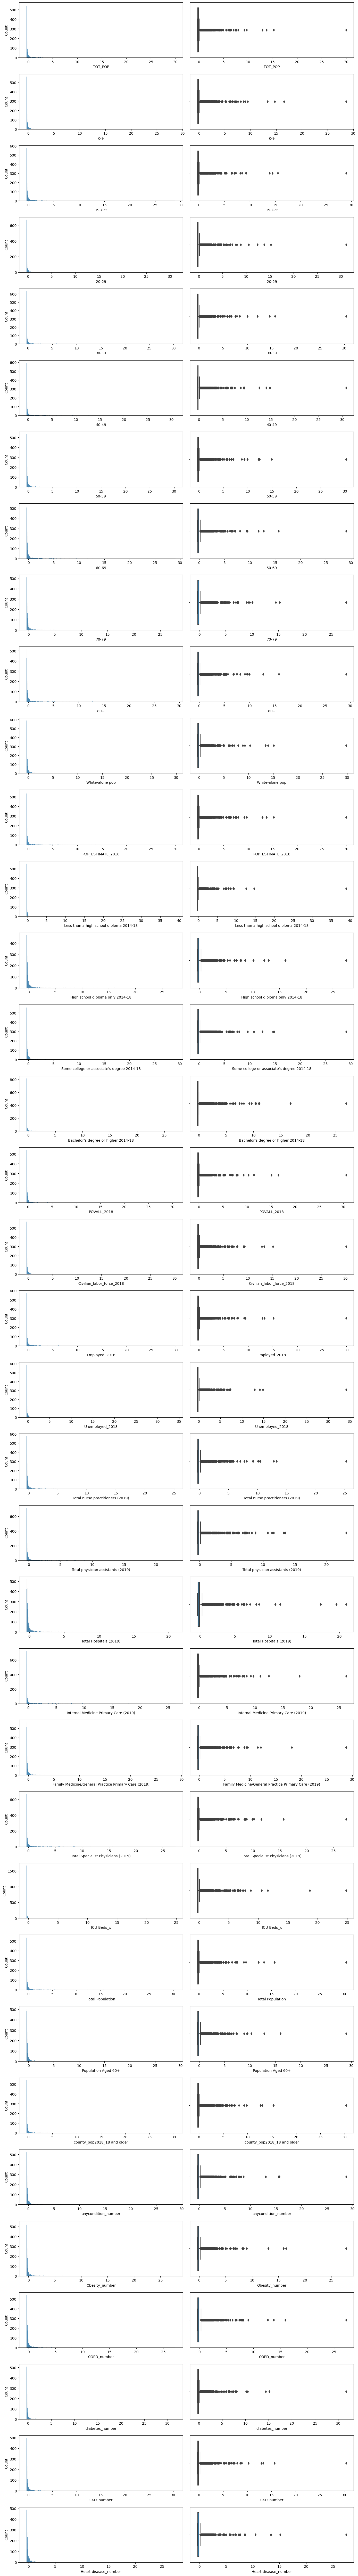

In [49]:
#Análisis sobre variables numericas

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure of subplots with configuration of 19 rows and 2 columns
fig, axis = plt.subplots(36, 2, figsize=(14, 100))

# Variables numéricas a incluir en el análisis
numeric_variables = ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
                     'White-alone pop', 'POP_ESTIMATE_2018', 'Less than a high school diploma 2014-18',
                     "High school diploma only 2014-18", "Some college or associate's degree 2014-18",
                     "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'Civilian_labor_force_2018',
                     'Employed_2018', 'Unemployed_2018', 'Total nurse practitioners (2019)',
                     'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
                     'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)',
                     'ICU Beds_x', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
                     'anycondition_number', 'Obesity_number', 'COPD_number', 'diabetes_number', 'CKD_number',
                     'Heart disease_number']

# Generar los histogramas y boxplots para las variables numéricas
for i, var in enumerate(numeric_variables):
    sns.histplot(ax=axis[i, 0], data=dataframe_filtered, x=var)
    sns.boxplot(ax=axis[i, 1], data=dataframe_filtered, x=var)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Conclusión:
en todos los plots vemos un outlier muy alejado del resto

In [50]:
#Análisis numérico-numérico

import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables = ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
                     'White-alone pop', 'POP_ESTIMATE_2018', 'Less than a high school diploma 2014-18',
                     "High school diploma only 2014-18", "Some college or associate's degree 2014-18",
                     "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'Civilian_labor_force_2018',
                     'Employed_2018', 'Unemployed_2018', 'Total nurse practitioners (2019)',
                     'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
                     'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)',
                     'ICU Beds_x', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
                     'anycondition_number', 'Obesity_number', 'COPD_number', 'diabetes_number', 'CKD_number',]

# Crear una figura de subplots con configuración de filas y columnas
num_rows = len(numeric_variables)
fig, axis = plt.subplots(num_rows, 2, figsize=(20, 8*num_rows))

# Generar los gráficos de dispersión y las matrices de correlación para las variables numéricas
for i, var in enumerate(numeric_variables):
    sns.regplot(ax=axis[i, 0], data=dataframe_filtered, x=var, y="Heart disease_number")
    sns.heatmap(dataframe_filtered[[var, "Heart disease_number"]].corr(), annot=True, fmt=".2f", ax=axis[i, 1], cbar=False)
    axis[i, 0].set_ylabel("Heart disease_number")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Conclusión:
en todos las varibales analizadas, tenemos muy buena comparación ya que de 0.92 no baja

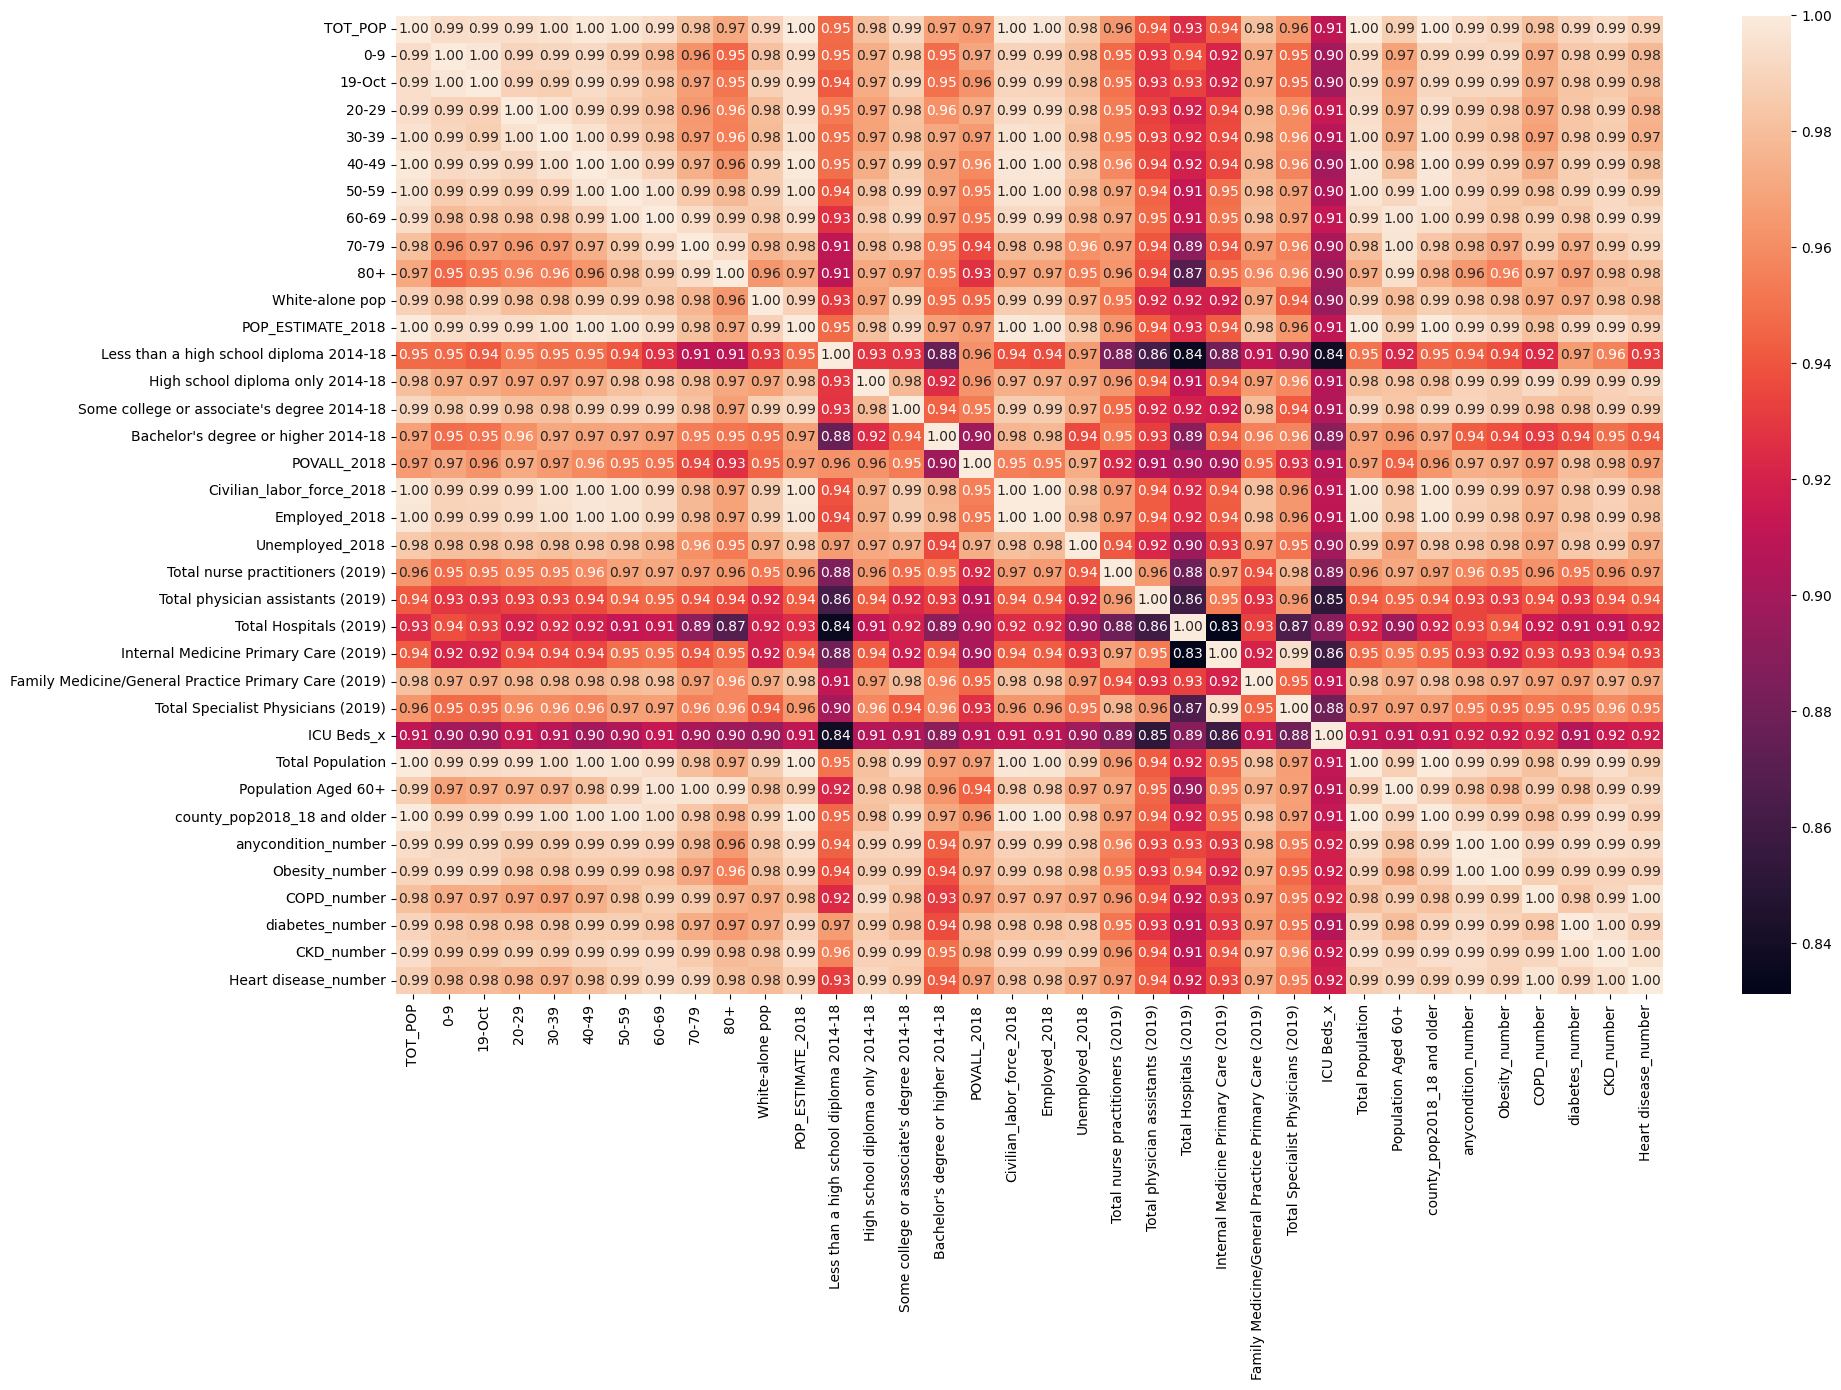

In [51]:
#analisis correlaciones

import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables = ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
                     'White-alone pop', 'POP_ESTIMATE_2018', 'Less than a high school diploma 2014-18',
                     "High school diploma only 2014-18", "Some college or associate's degree 2014-18",
                     "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'Civilian_labor_force_2018',
                     'Employed_2018', 'Unemployed_2018', 'Total nurse practitioners (2019)',
                     'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
                     'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)',
                     'ICU Beds_x', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
                     'anycondition_number', 'Obesity_number', 'COPD_number', 'diabetes_number', 'CKD_number','Heart disease_number']

# Crear una figura de subplots con configuración de 1 fila y 1 columna
fig, axis = plt.subplots(figsize=(20, 14))

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = dataframe_filtered[numeric_variables].corr()

# Generar el heatmap de correlaciones
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=axis)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Conclusión:
Viendo el heamap vemos que nuestras variables tienen muy buena correlación. Vamos a elegir alguna variable aleatoriamente para analizar

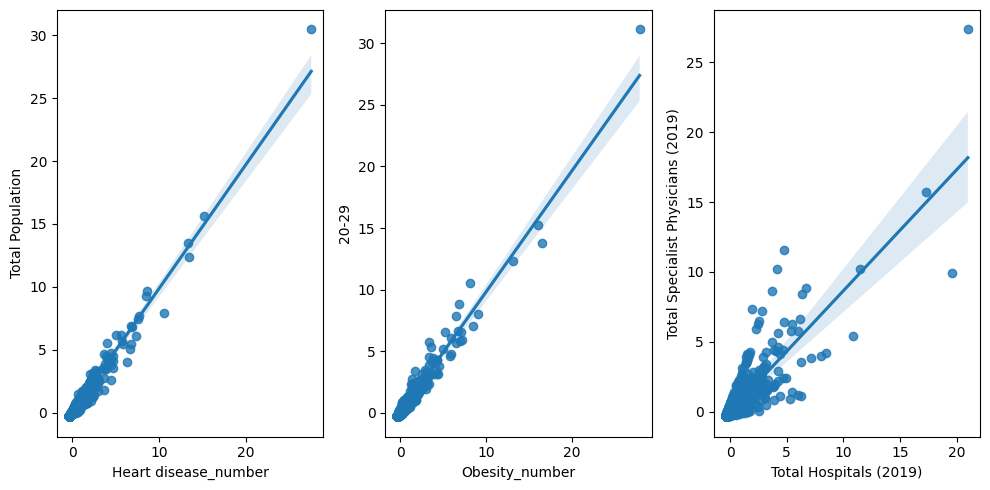

In [52]:
#Analizamos las variables mas altas

fig, axis = plt.subplots(figsize = (10, 5), ncols = 3)

sns.regplot(ax = axis[0], data = dataframe_filtered, x = "Heart disease_number", y = "Total Population")
sns.regplot(ax = axis[1], data = dataframe_filtered, x = "Obesity_number", y = "20-29")
sns.regplot(ax = axis[2], data = dataframe_filtered, x = "Total Hospitals (2019)", y = "Total Specialist Physicians (2019)")

plt.tight_layout()

plt.show()

In [53]:
#dibujar el pairplot

'''sns.pairplot(data = dataframe_filtered)'''

'sns.pairplot(data = dataframe_filtered)'

- Conclusión:
Hacemos pairplot para ver las 36 variables con todos sus datos.

In [54]:
#análisis descriptivo

dataframe_filtered.describe()

TOT_POP           0-9        19-Oct         20-29         30-39   
count  3.140000e+03  3.140000e+03  3.140000e+03  3.140000e+03  3.140000e+03  \
mean  -9.051500e-18  2.262875e-18  9.051500e-18  7.920062e-18 -1.131437e-18   
std    1.000159e+00  1.000159e+00  1.000159e+00  1.000159e+00  1.000159e+00   
min   -3.121198e-01 -3.047872e-01 -3.161948e-01 -2.918979e-01 -2.838831e-01   
25%   -2.795133e-01 -2.741537e-01 -2.836836e-01 -2.664036e-01 -2.589409e-01   
50%   -2.350279e-01 -2.316544e-01 -2.387544e-01 -2.291985e-01 -2.228519e-01   
75%   -1.087650e-01 -1.110821e-01 -1.075208e-01 -1.108150e-01 -1.143708e-01   
max    2.998627e+01  2.860034e+01  2.899335e+01  3.111981e+01  3.037631e+01   

              40-49         50-59         60-69         70-79           80+   
count  3.140000e+03  3.140000e+03  3.140000e+03  3.140000e+03  3.140000e+03  \
mean   1.584012e-17 -1.357725e-17 -2.036587e-17 -1.357725e-17 -2.262875e-18   
std    1.000159e+00  1.000159e+00  1.000159e+00  1.000159e+00  1.000159e+00   
min   -2.963565e-01 -3.189607e-01 -3.446870e-01 -3.556604e-01 -3.345704e-01   
25%   -2.677992e-01 -2.845690e-01 -3.024857e-01 -3.090849e-01 -2.903815e-01   
50%   -2.263121e-01 -2.369849e-01 -2.464634e-01 -2.486316e-01 -2.383995e-01   
75%   -1.096212e-01 -1.049024e-01 -9.288399e-02 -8.116194e-02 -9.416389e-02   
max    3.076458e+01  3.025636e+01  2.904431e+01  2.786937e+01  2.920275e+01   

       ...    ICU Beds_x  Total Population  Population Aged 60+   
count  ...  3.140000e+03      3.140000e+03         3.140000e+03  \
mean   ... -3.960031e-17     -2.262875e-18        -2.941737e-17   
std    ...  1.000159e+00      1.000159e+00         1.000159e+00   
min    ... -2.815690e-01     -3.111227e-01        -3.468620e-01   
25%    ... -2.815690e-01     -2.779462e-01        -3.014560e-01   
50%    ... -2.815690e-01     -2.330623e-01        -2.445265e-01   
75%    ... -1.397058e-01     -1.057634e-01        -8.496838e-02   
max    ...  2.485185e+01      3.046729e+01         2.897607e+01   

       county_pop2018_18 and older  anycondition_number  Obesity_number   
count                 3.140000e+03         3.140000e+03    3.140000e+03  \
mean                  6.788625e-18         3.846887e-17    9.051500e-18   
std                   1.000159e+00         1.000159e+00    1.000159e+00   
min                  -3.123154e-01        -3.372518e-01   -3.391463e-01   
25%                  -2.799248e-01        -2.950351e-01   -2.981820e-01   
50%                  -2.343899e-01        -2.390227e-01   -2.430144e-01   
75%                  -1.083046e-01        -8.479893e-02   -9.043897e-02   
max                   3.031521e+01         2.876407e+01    2.783736e+01   

        COPD_number  diabetes_number    CKD_number  Heart disease_number  
count  3.140000e+03     3.140000e+03  3.140000e+03          3.140000e+03  
mean   1.584012e-17     3.168025e-17 -1.131437e-17          1.584012e-17  
std    1.000159e+00     1.000159e+00  1.000159e+00          1.000159e+00  
min   -3.702904e-01    -3.131301e-01 -3.186924e-01         -3.580776e-01  
25%   -3.188845e-01    -2.735753e-01 -2.783582e-01         -3.073820e-01  
50%   -2.458157e-01    -2.212978e-01 -2.261859e-01         -2.423072e-01  
75%   -6.999866e-02    -8.898622e-02 -8.926990e-02         -7.824307e-02  
max    2.724561e+01     3.169791e+01  3.044300e+01          2.748978e+01  

[8 rows x 36 columns]

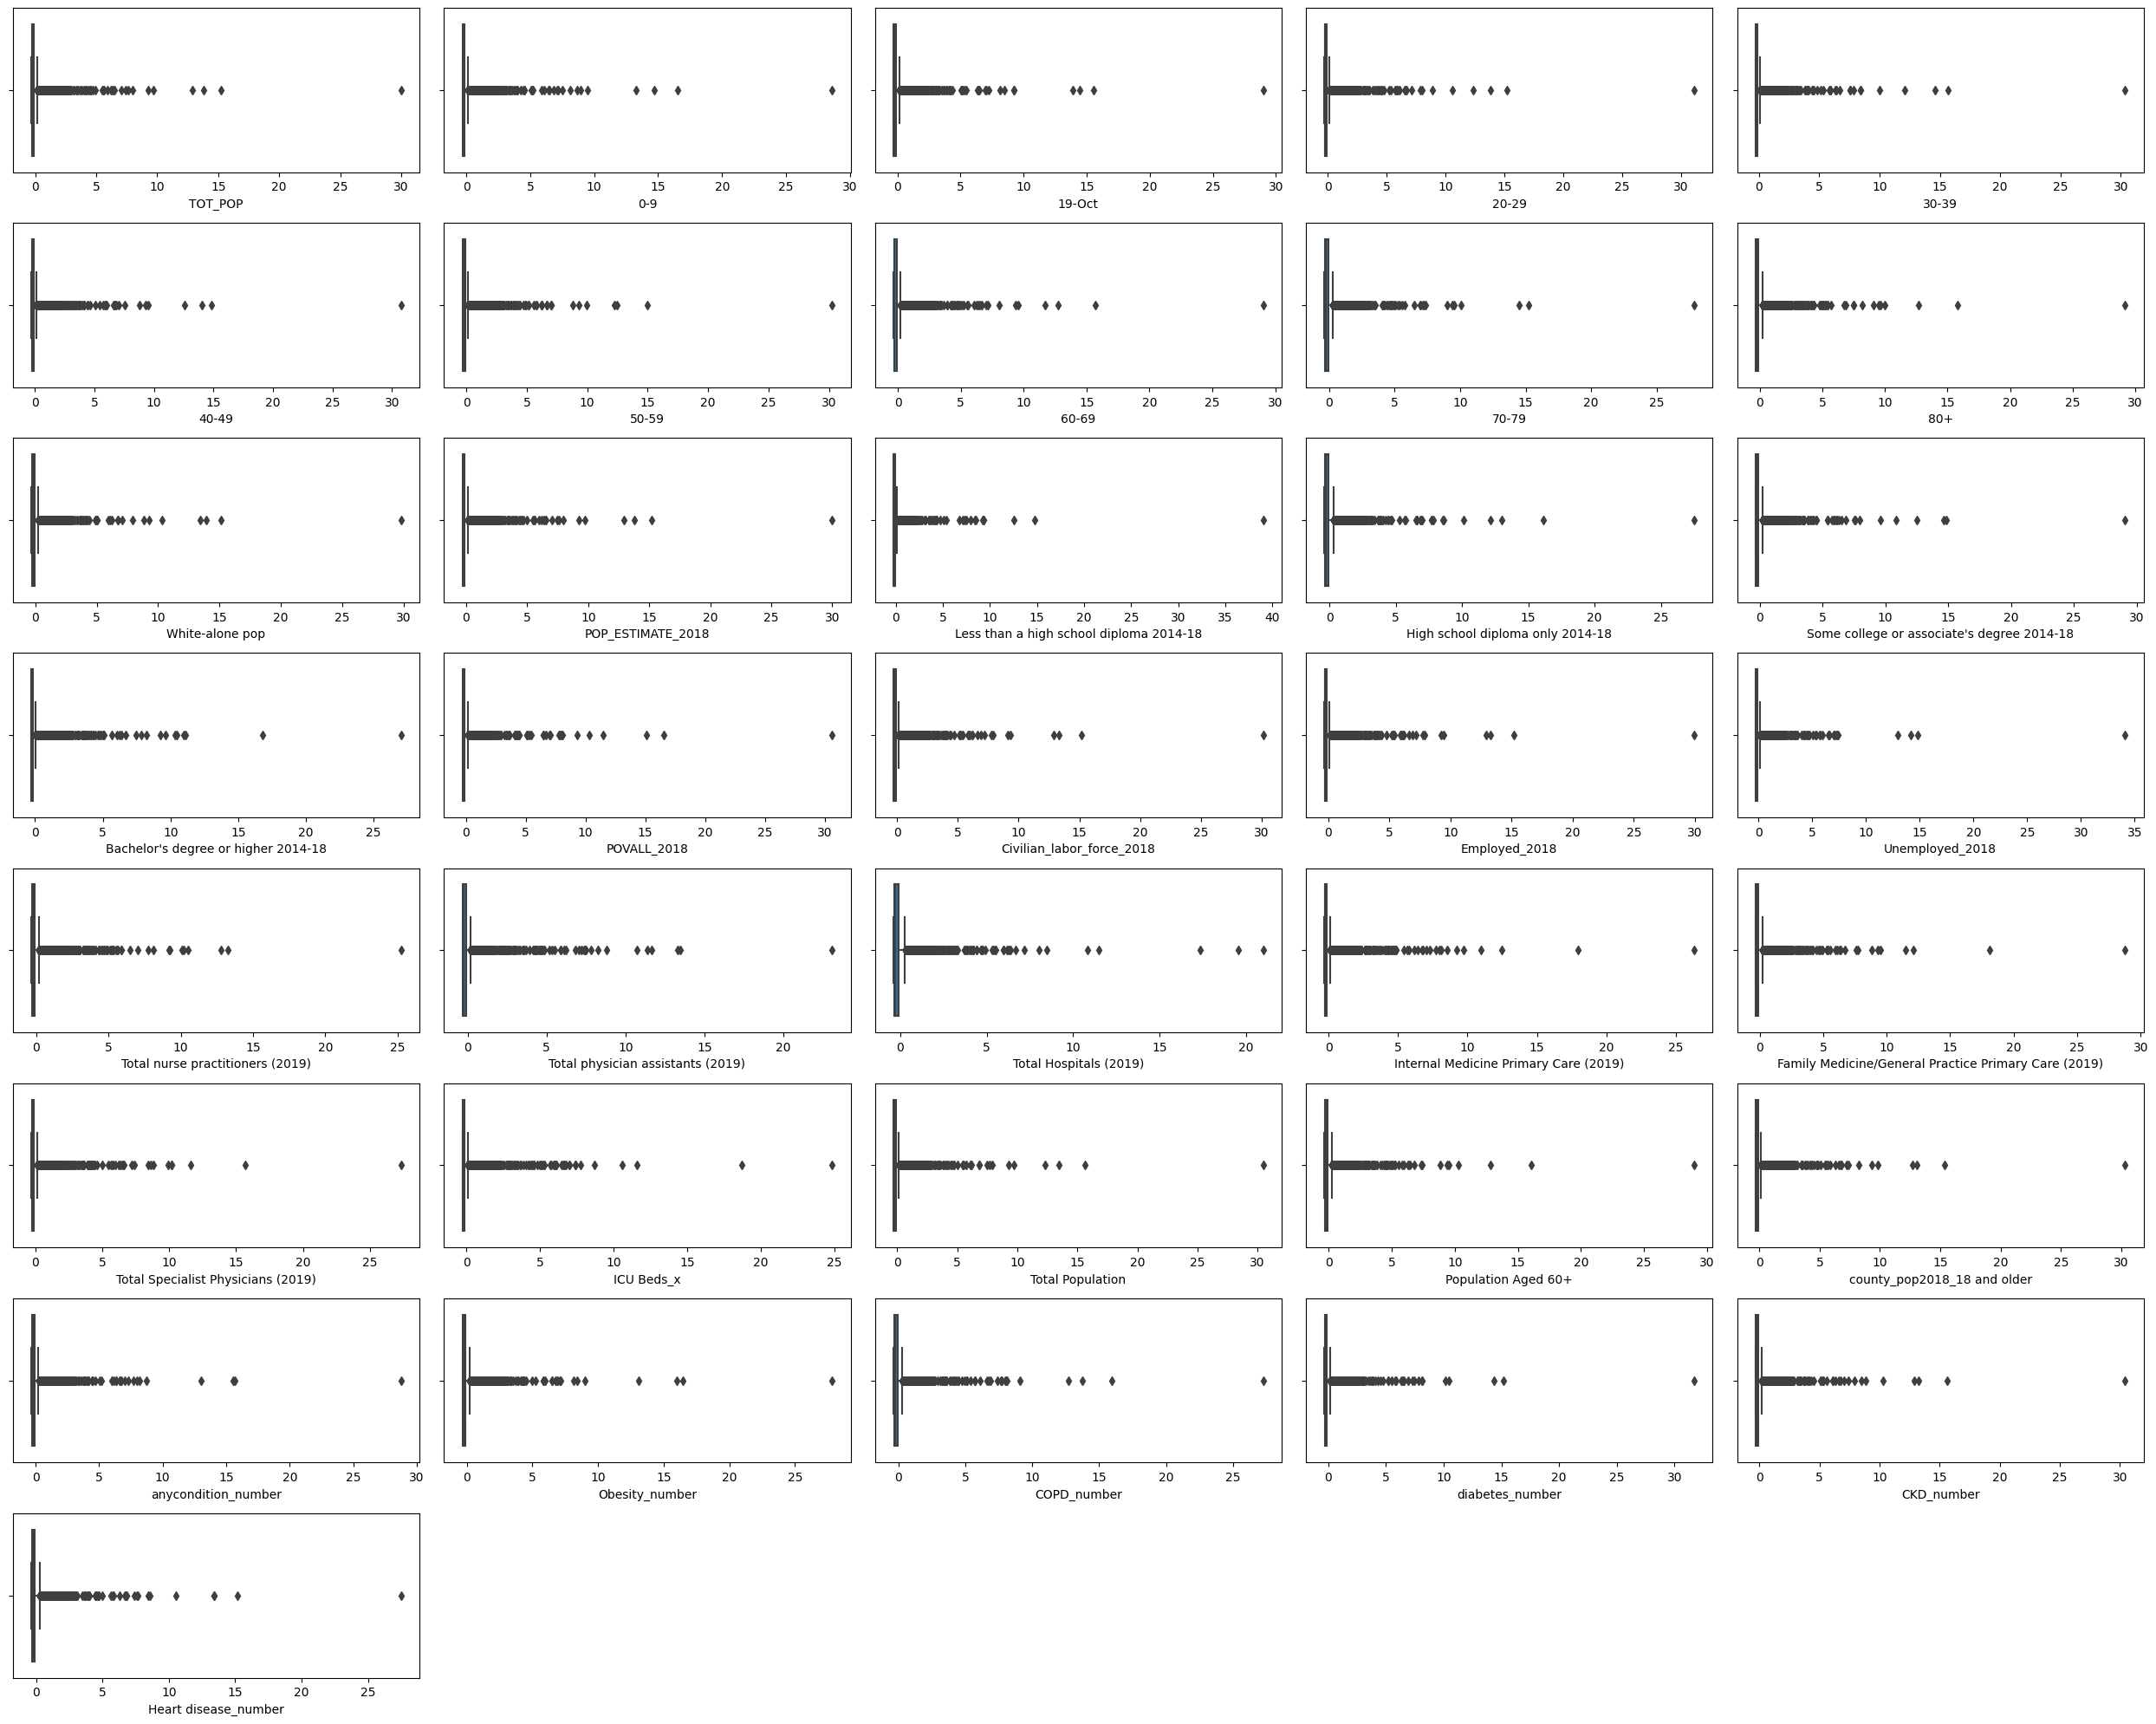

In [55]:
#Buscar outliers

fig, axis = plt.subplots(8, 5, figsize=(25, 20))

sns.boxplot(ax=axis[0, 0], data=dataframe_filtered, x='TOT_POP')
sns.boxplot(ax=axis[0, 1], data=dataframe_filtered, x='0-9')
sns.boxplot(ax=axis[0, 2], data=dataframe_filtered, x='19-Oct')
sns.boxplot(ax=axis[0, 3], data=dataframe_filtered, x='20-29')
sns.boxplot(ax=axis[0, 4], data=dataframe_filtered, x='30-39')

sns.boxplot(ax=axis[1, 0], data=dataframe_filtered, x='40-49')
sns.boxplot(ax=axis[1, 1], data=dataframe_filtered, x='50-59')
sns.boxplot(ax=axis[1, 2], data=dataframe_filtered, x='60-69')
sns.boxplot(ax=axis[1, 3], data=dataframe_filtered, x='70-79')
sns.boxplot(ax=axis[1, 4], data=dataframe_filtered, x='80+')

sns.boxplot(ax=axis[2, 0], data=dataframe_filtered, x='White-alone pop')
sns.boxplot(ax=axis[2, 1], data=dataframe_filtered, x='POP_ESTIMATE_2018')
sns.boxplot(ax=axis[2, 2], data=dataframe_filtered, x="Less than a high school diploma 2014-18")
sns.boxplot(ax=axis[2, 3], data=dataframe_filtered, x="High school diploma only 2014-18")
sns.boxplot(ax=axis[2, 4], data=dataframe_filtered, x="Some college or associate's degree 2014-18")

sns.boxplot(ax=axis[3, 0], data=dataframe_filtered, x="Bachelor's degree or higher 2014-18")
sns.boxplot(ax=axis[3, 1], data=dataframe_filtered, x='POVALL_2018')
sns.boxplot(ax=axis[3, 2], data=dataframe_filtered, x='Civilian_labor_force_2018')
sns.boxplot(ax=axis[3, 3], data=dataframe_filtered, x='Employed_2018')
sns.boxplot(ax=axis[3, 4], data=dataframe_filtered, x='Unemployed_2018')

sns.boxplot(ax=axis[4, 0], data=dataframe_filtered, x='Total nurse practitioners (2019)')
sns.boxplot(ax=axis[4, 1], data=dataframe_filtered, x='Total physician assistants (2019)')
sns.boxplot(ax=axis[4, 2], data=dataframe_filtered, x='Total Hospitals (2019)')
sns.boxplot(ax=axis[4, 3], data=dataframe_filtered, x='Internal Medicine Primary Care (2019)')
sns.boxplot(ax=axis[4, 4], data=dataframe_filtered, x='Family Medicine/General Practice Primary Care (2019)')

sns.boxplot(ax=axis[5, 0], data=dataframe_filtered, x='Total Specialist Physicians (2019)')
sns.boxplot(ax=axis[5, 1], data=dataframe_filtered, x='ICU Beds_x')
sns.boxplot(ax=axis[5, 2], data=dataframe_filtered, x='Total Population')
sns.boxplot(ax=axis[5, 3], data=dataframe_filtered, x='Population Aged 60+')
sns.boxplot(ax=axis[5, 4], data=dataframe_filtered, x='county_pop2018_18 and older')

sns.boxplot(ax=axis[6, 0], data=dataframe_filtered, x='anycondition_number')
sns.boxplot(ax=axis[6, 1], data=dataframe_filtered, x='Obesity_number')
sns.boxplot(ax=axis[6, 2], data=dataframe_filtered, x='COPD_number')
sns.boxplot(ax=axis[6, 3], data=dataframe_filtered, x='diabetes_number')
sns.boxplot(ax=axis[6, 4], data=dataframe_filtered, x='CKD_number')

sns.boxplot(ax=axis[7, 0], data=dataframe_filtered, x='Heart disease_number')
fig.delaxes(axis[7, 1])
fig.delaxes(axis[7, 2])
fig.delaxes(axis[7, 3])
fig.delaxes(axis[7, 4])



plt.tight_layout()

plt.show()


- Conclusión:
Como hemos visto arriba, vemos en todas las variables, un outlier muy separado del resto por lo que vamos a analizarlas para saber el limite superior/inferior y el rango intercuartilico

In [56]:
# Analizar outliers para cada variable seleccionada
numeric_variables = ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
                     'White-alone pop', 'POP_ESTIMATE_2018', 'Less than a high school diploma 2014-18',
                     "High school diploma only 2014-18", "Some college or associate's degree 2014-18",
                     "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'Civilian_labor_force_2018',
                     'Employed_2018', 'Unemployed_2018', 'Total nurse practitioners (2019)',
                     'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
                     'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)',
                     'ICU Beds_x', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
                     'anycondition_number', 'Obesity_number', 'COPD_number', 'diabetes_number', 'CKD_number', 'Heart disease_number']

for variable in numeric_variables:
    variable_stats = dataframe_filtered[variable].describe()
    print(variable_stats)

    variable_iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * variable_iqr
    lower_limit = variable_stats["25%"] - 1.5 * variable_iqr

    print(f"- Los límites superior e inferior para la búsqueda de outliers en {variable} son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(variable_iqr, 2)}\n")


count    3.140000e+03
mean    -9.051500e-18
std      1.000159e+00
min     -3.121198e-01
25%     -2.795133e-01
50%     -2.350279e-01
75%     -1.087650e-01
max      2.998627e+01
Name: TOT_POP, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en TOT_POP son 0.15 y -0.54, con un rango intercuartílico de 0.17

count    3.140000e+03
mean     2.262875e-18
std      1.000159e+00
min     -3.047872e-01
25%     -2.741537e-01
50%     -2.316544e-01
75%     -1.110821e-01
max      2.860034e+01
Name: 0-9, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en 0-9 son 0.13 y -0.52, con un rango intercuartílico de 0.16

count    3.140000e+03
mean     9.051500e-18
std      1.000159e+00
min     -3.161948e-01
25%     -2.836836e-01
50%     -2.387544e-01
75%     -1.075208e-01
max      2.899335e+01
Name: 19-Oct, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en 19-Oct son 0.16 y -0.55, con un rango intercuartílico de 0.18

co

count    3.140000e+03
mean     4.525750e-18
std      1.000159e+00
min     -2.922718e-01
25%     -2.572518e-01
50%     -2.096118e-01
75%     -8.620288e-02
max      3.060858e+01
Name: POVALL_2018, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en POVALL_2018 son 0.17 y -0.51, con un rango intercuartílico de 0.17

count    3.140000e+03
mean     9.051500e-18
std      1.000159e+00
min     -3.050175e-01
25%     -2.758583e-01
50%     -2.363827e-01
75%     -1.175531e-01
max      3.013027e+01
Name: Civilian_labor_force_2018, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en Civilian_labor_force_2018 son 0.12 y -0.51, con un rango intercuartílico de 0.16

count    3.140000e+03
mean    -1.357725e-17
std      1.000159e+00
min     -3.055030e-01
25%     -2.763888e-01
50%     -2.368628e-01
75%     -1.181148e-01
max      2.993272e+01
Name: Employed_2018, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en Employ

In [57]:
#Análisis de valores faltantes

dataframe_filtered.isnull().sum()

TOT_POP                                                 0
0-9                                                     0
19-Oct                                                  0
20-29                                                   0
30-39                                                   0
40-49                                                   0
50-59                                                   0
60-69                                                   0
70-79                                                   0
80+                                                     0
White-alone pop                                         0
POP_ESTIMATE_2018                                       0
Less than a high school diploma 2014-18                 0
High school diploma only 2014-18                        0
Some college or associate's degree 2014-18              0
Bachelor's degree or higher 2014-18                     0
POVALL_2018                                             0
Civilian_labor

In [58]:
#escalado de valores (feature scaling)


#Normalización

from sklearn.preprocessing import StandardScaler

# Variables numéricas seleccionadas
numeric_variables = ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
                     'White-alone pop', 'POP_ESTIMATE_2018', 'Less than a high school diploma 2014-18',
                     "High school diploma only 2014-18", "Some college or associate's degree 2014-18",
                     "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'Civilian_labor_force_2018',
                     'Employed_2018', 'Unemployed_2018', 'Total nurse practitioners (2019)',
                     'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
                     'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)',
                     'ICU Beds_x', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
                     'anycondition_number', 'Obesity_number', 'COPD_number', 'diabetes_number', 'CKD_number','Heart disease_number']

# Crear un DataFrame con las variables numéricas seleccionadas
dataframe_selected = dataframe_filtered[numeric_variables]

# Normalizar las variables numéricas
scaler = StandardScaler()
norm_features = scaler.fit_transform(dataframe_selected)

# Crear un DataFrame con las variables normalizadas
dataframe_norm = pd.DataFrame(norm_features, index=dataframe_selected.index, columns=numeric_variables)
dataframe_norm.head(10)

TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59   
1292 -0.232556 -0.227731 -0.234284 -0.232951 -0.226353 -0.231316 -0.229599  \
2302 -0.158676 -0.178665 -0.180166 -0.188266 -0.175070 -0.161168 -0.134688   
761  -0.199114 -0.211128 -0.195138 -0.166782 -0.195036 -0.194045 -0.199725   
2194 -0.036595 -0.037734 -0.017077 -0.057986 -0.052252 -0.033158 -0.020228   
1241  0.090839  0.094680  0.101662  0.056721  0.042392  0.068095  0.101699   
221   2.335967  1.417842  1.118606  2.763126  3.459669  2.483265  2.195003   
543  -0.251523 -0.246535 -0.256305 -0.242614 -0.237500 -0.241991 -0.250248   
2360 -0.303986 -0.296151 -0.306686 -0.286310 -0.276962 -0.289846 -0.311539   
2250  1.571089  1.241457  1.514630  1.129087  1.211876  1.499836  2.018620   
1803 -0.299368 -0.293926 -0.303351 -0.280460 -0.270797 -0.285934 -0.306810   

         60-69     70-79       80+  ...  ICU Beds_x  Total Population   
1292 -0.233425 -0.234680 -0.234420  ...   -0.281569         -0.231195  \
2302 -0.105618 -0.119270 -0.091822  ...   -0.186994         -0.150293   
761  -0.219256 -0.222207 -0.205154  ...   -0.210637         -0.197005   
2194 -0.032603 -0.023876 -0.046224  ...   -0.210637         -0.036940   
1241  0.144664  0.140685  0.166099  ...    0.096733          0.097767   
221   2.369472  2.335785  2.924379  ...    3.702421          2.320907   
543  -0.268078 -0.265936 -0.268246  ...   -0.281569         -0.247971   
2360 -0.334343 -0.344519 -0.319316  ...   -0.281569         -0.303006   
2250  2.116090  2.063357  2.192569  ...    0.782405          1.596718   
1803 -0.329997 -0.338800 -0.313015  ...   -0.281569         -0.297868   

      Population Aged 60+  county_pop2018_18 and older  anycondition_number   
1292            -0.229737                    -0.233171            -0.234370  \
2302            -0.098866                    -0.152859            -0.142645   
761             -0.216056                    -0.195125            -0.193205   
2194            -0.030034                    -0.039882            -0.003321   
1241             0.161314                     0.088485             0.165555   
221              2.571336                     2.645482             1.508821   
543             -0.263730                    -0.251687            -0.264177   
2360            -0.335379                    -0.304508            -0.329069   
2250             2.125314                     1.621665             1.649004   
1803            -0.328587                    -0.299363            -0.320877   

      Obesity_number  COPD_number  diabetes_number  CKD_number   
1292       -0.232975    -0.223516        -0.218609   -0.219329  \
2302       -0.155304    -0.110080        -0.131449   -0.130962   
761        -0.201976    -0.193106        -0.189197   -0.206391   
2194        0.006163    -0.007077        -0.047515   -0.045054   
1241        0.182740     0.265603         0.123040    0.132454   
221         1.385789     1.467024         1.947284    1.993193   
543        -0.269843    -0.264552        -0.231550   -0.240418   
2360       -0.330886    -0.362592        -0.306239   -0.310800   
2250        1.661647     1.664122         1.481097    1.444623   
1803       -0.323002    -0.357948        -0.296962   -0.302391   

      Heart disease_number  
1292             -0.225814  
2302             -0.115392  
761              -0.216207  
2194             -0.007276  
1241              0.197812  
221               1.888156  
543              -0.266742  
2360             -0.347958  
2250              1.662700  
1803             -0.341873  

[10 rows x 36 columns]

In [59]:
#escalado minimo-maximo

from sklearn.preprocessing import MinMaxScaler

#Variables numéricas seleccionadas
numeric_variables = ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
                     'White-alone pop', 'POP_ESTIMATE_2018', 'Less than a high school diploma 2014-18',
                     "High school diploma only 2014-18", "Some college or associate's degree 2014-18",
                     "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'Civilian_labor_force_2018',
                     'Employed_2018', 'Unemployed_2018', 'Total nurse practitioners (2019)',
                     'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
                     'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)',
                     'ICU Beds_x', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
                     'anycondition_number', 'Obesity_number', 'COPD_number', 'diabetes_number', 'CKD_number','Heart disease_number']

# Crear un DataFrame con las variables numéricas seleccionadas
dataframe_selected = dataframe_filtered[numeric_variables]

# Escalar las variables numéricas utilizando MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dataframe_selected)

# Crear un DataFrame con las variables escaladas
dataframe_scal = pd.DataFrame(scaled_features, index=dataframe_selected.index, columns=numeric_variables)
dataframe_scal.head(10)



TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59   
1292  0.002626  0.002666  0.002795  0.001877  0.001876  0.002094  0.002923  \
2302  0.005064  0.004363  0.004641  0.003299  0.003549  0.004352  0.006027   
761   0.003730  0.003240  0.004130  0.003983  0.002898  0.003294  0.003900   
2194  0.009094  0.009239  0.010205  0.007447  0.007555  0.008474  0.009770   
1241  0.013300  0.013820  0.014257  0.011098  0.010642  0.011733  0.013758   
221   0.087400  0.059596  0.048953  0.097257  0.122098  0.089489  0.082222   
543   0.002000  0.002015  0.002043  0.001569  0.001513  0.001750  0.002247   
2360  0.000268  0.000299  0.000324  0.000178  0.000226  0.000210  0.000243   
2250  0.062155  0.053494  0.062465  0.045237  0.048785  0.057828  0.076453   
1803  0.000421  0.000376  0.000438  0.000364  0.000427  0.000336  0.000397   

         60-69     70-79       80+  ...  ICU Beds_x  Total Population   
1292  0.003786  0.004286  0.003391  ...    0.000000          0.002597  \
2302  0.008135  0.008375  0.008218  ...    0.003763          0.005225   
761   0.004268  0.004728  0.004381  ...    0.002822          0.003708   
2194  0.010619  0.011755  0.009762  ...    0.002822          0.008908   
1241  0.016651  0.017585  0.016950  ...    0.015052          0.013285   
221   0.092353  0.095357  0.110333  ...    0.158514          0.085515   
543   0.002607  0.003179  0.002245  ...    0.000000          0.002052   
2360  0.000352  0.000395  0.000516  ...    0.000000          0.000264   
2250  0.083731  0.085705  0.085558  ...    0.042333          0.061986   
1803  0.000500  0.000597  0.000730  ...    0.000000          0.000431   

      Population Aged 60+  county_pop2018_18 and older  anycondition_number   
1292             0.003994                     0.002584             0.003535  \
2302             0.008457                     0.005206             0.006687   
761              0.004461                     0.003826             0.004950   
2194             0.010805                     0.008895             0.011475   
1241             0.017330                     0.013086             0.017278   
221              0.099519                     0.096573             0.063436   
543              0.002835                     0.001980             0.002511   
2360             0.000392                     0.000255             0.000281   
2250             0.084309                     0.063145             0.068253   
1803             0.000623                     0.000423             0.000563   

      Obesity_number  COPD_number  diabetes_number  CKD_number   
1292        0.003768     0.005315         0.002953    0.003230  \
2302        0.006525     0.009422         0.005676    0.006103   
761         0.004868     0.006416         0.003872    0.003651   
2194        0.012255     0.013152         0.008298    0.008895   
1241        0.018522     0.023026         0.013626    0.014666   
221         0.061219     0.066531         0.070614    0.075155   
543         0.002460     0.003829         0.002549    0.002545   
2360        0.000293     0.000279         0.000215    0.000257   
2250        0.071009     0.073668         0.056050    0.057322   
1803        0.000573     0.000447         0.000505    0.000530   

      Heart disease_number  
1292              0.004749  
2302              0.008715  
761               0.005094  
2194              0.012597  
1241              0.019962  
221               0.080661  
543               0.003280  
2360              0.000363  
2250              0.072565  
1803              0.000582  

[10 rows x 36 columns]

In [92]:
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Supongamos que tienes un dataframe llamado "dataframe_scal" que contiene las características y la variable objetivo.

# Transformar la variable objetivo y a binario
y = dataframe_scal["Heart disease_number"]
y_bin = (y > 0.5).astype(int)

# Dividimos el conjunto de datos en entrenamiento (train) y pruebas (test)
X = dataframe_scal.drop("Heart disease_number", axis=1)

# Aquí puedes utilizar "y" o "y_bin", dependiendo de si deseas la variable original o la binaria para el entrenamiento.
# Si utilizas "y", asegúrate de que "y" sea categórica o discreta (no valores continuos).
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Con un valor de k = 5, queremos decir implícitamente que queremos mantener las 5 mejores características en el conjunto de datos
selection_model = SelectKBest(chi2, k=7)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

X_train_sel.head()

20-29     30-39  Less than a high school diploma 2014-18   
0  0.015634  0.018612                                 0.003695  \
1  0.015143  0.016781                                 0.009794   
2  0.004379  0.004569                                 0.001874   
3  0.005653  0.006955                                 0.002315   
4  0.003413  0.003477                                 0.001193   

   Bachelor's degree or higher 2014-18  Unemployed_2018   
0                             0.020922         0.010420  \
1                             0.021160         0.014148   
2                             0.007963         0.003736   
3                             0.003955         0.004695   
4                             0.003443         0.002464   

   Internal Medicine Primary Care (2019)  ICU Beds_x  
0                               0.014954    0.003763  
1                               0.017832    0.023989  
2                               0.006768    0.006585  
3                               0.003751    0.001881  
4                               0.002636    0.004704

In [93]:
X_test_sel.head()


20-29     30-39  Less than a high school diploma 2014-18   
0  0.014731  0.006236                                 0.002464  \
1  0.003805  0.002691                                 0.001879   
2  0.001785  0.001838                                 0.001144   
3  0.013724  0.013687                                 0.011377   
4  0.001893  0.001925                                 0.002314   

   Bachelor's degree or higher 2014-18  Unemployed_2018   
0                             0.007426         0.004733  \
1                             0.002742         0.003427   
2                             0.000738         0.001676   
3                             0.019872         0.019677   
4                             0.001101         0.001484   

   Internal Medicine Primary Care (2019)  ICU Beds_x  
0                               0.004795    0.005174  
1                               0.005491    0.003293  
2                               0.001416    0.001881  
3                               0.018819    0.018344  
4                               0.001915    0.000000

In [94]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\016-PROYECTO1-regularized-linear-regression-project-tutorial-main\train_Heart disease_number.csv", index=False)
X_test_sel.to_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\016-PROYECTO1-regularized-linear-regression-project-tutorial-main\test_Heart disease_number.csv", index=False)

- Conslusion

se seleccionan aleatoriamente las variables mas importates de nuestro dataset para empezar a construir un modelo de regresion linear regularizada. Para ello empezamos cn un analisis lineal multiple al tener mas de dos variables.


## Paso 3: Construye un modelo de regresión lineal regularizada (1º-lineal,2º-lasso)

In [95]:
# Regresión lineal múltiple

#Paso 1. Lectura del conjunto de datos procesado¶

import pandas as pd
import matplotlib.pyplot as plt 

train_data = pd.read_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\016-PROYECTO1-regularized-linear-regression-project-tutorial-main\train_Heart disease_number.csv")
test_data = pd.read_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\016-PROYECTO1-regularized-linear-regression-project-tutorial-main\test_Heart disease_number.csv")

train_data.head()

20-29     30-39  Less than a high school diploma 2014-18   
0  0.015634  0.018612                                 0.003695  \
1  0.015143  0.016781                                 0.009794   
2  0.004379  0.004569                                 0.001874   
3  0.005653  0.006955                                 0.002315   
4  0.003413  0.003477                                 0.001193   

   Bachelor's degree or higher 2014-18  Unemployed_2018   
0                             0.020922         0.010420  \
1                             0.021160         0.014148   
2                             0.007963         0.003736   
3                             0.003955         0.004695   
4                             0.003443         0.002464   

   Internal Medicine Primary Care (2019)  ICU Beds_x  y_n  
0                               0.014954    0.003763    0  
1                               0.017832    0.023989    0  
2                               0.006768    0.006585    0  
3                               0.003751    0.001881    0  
4                               0.002636    0.004704    0

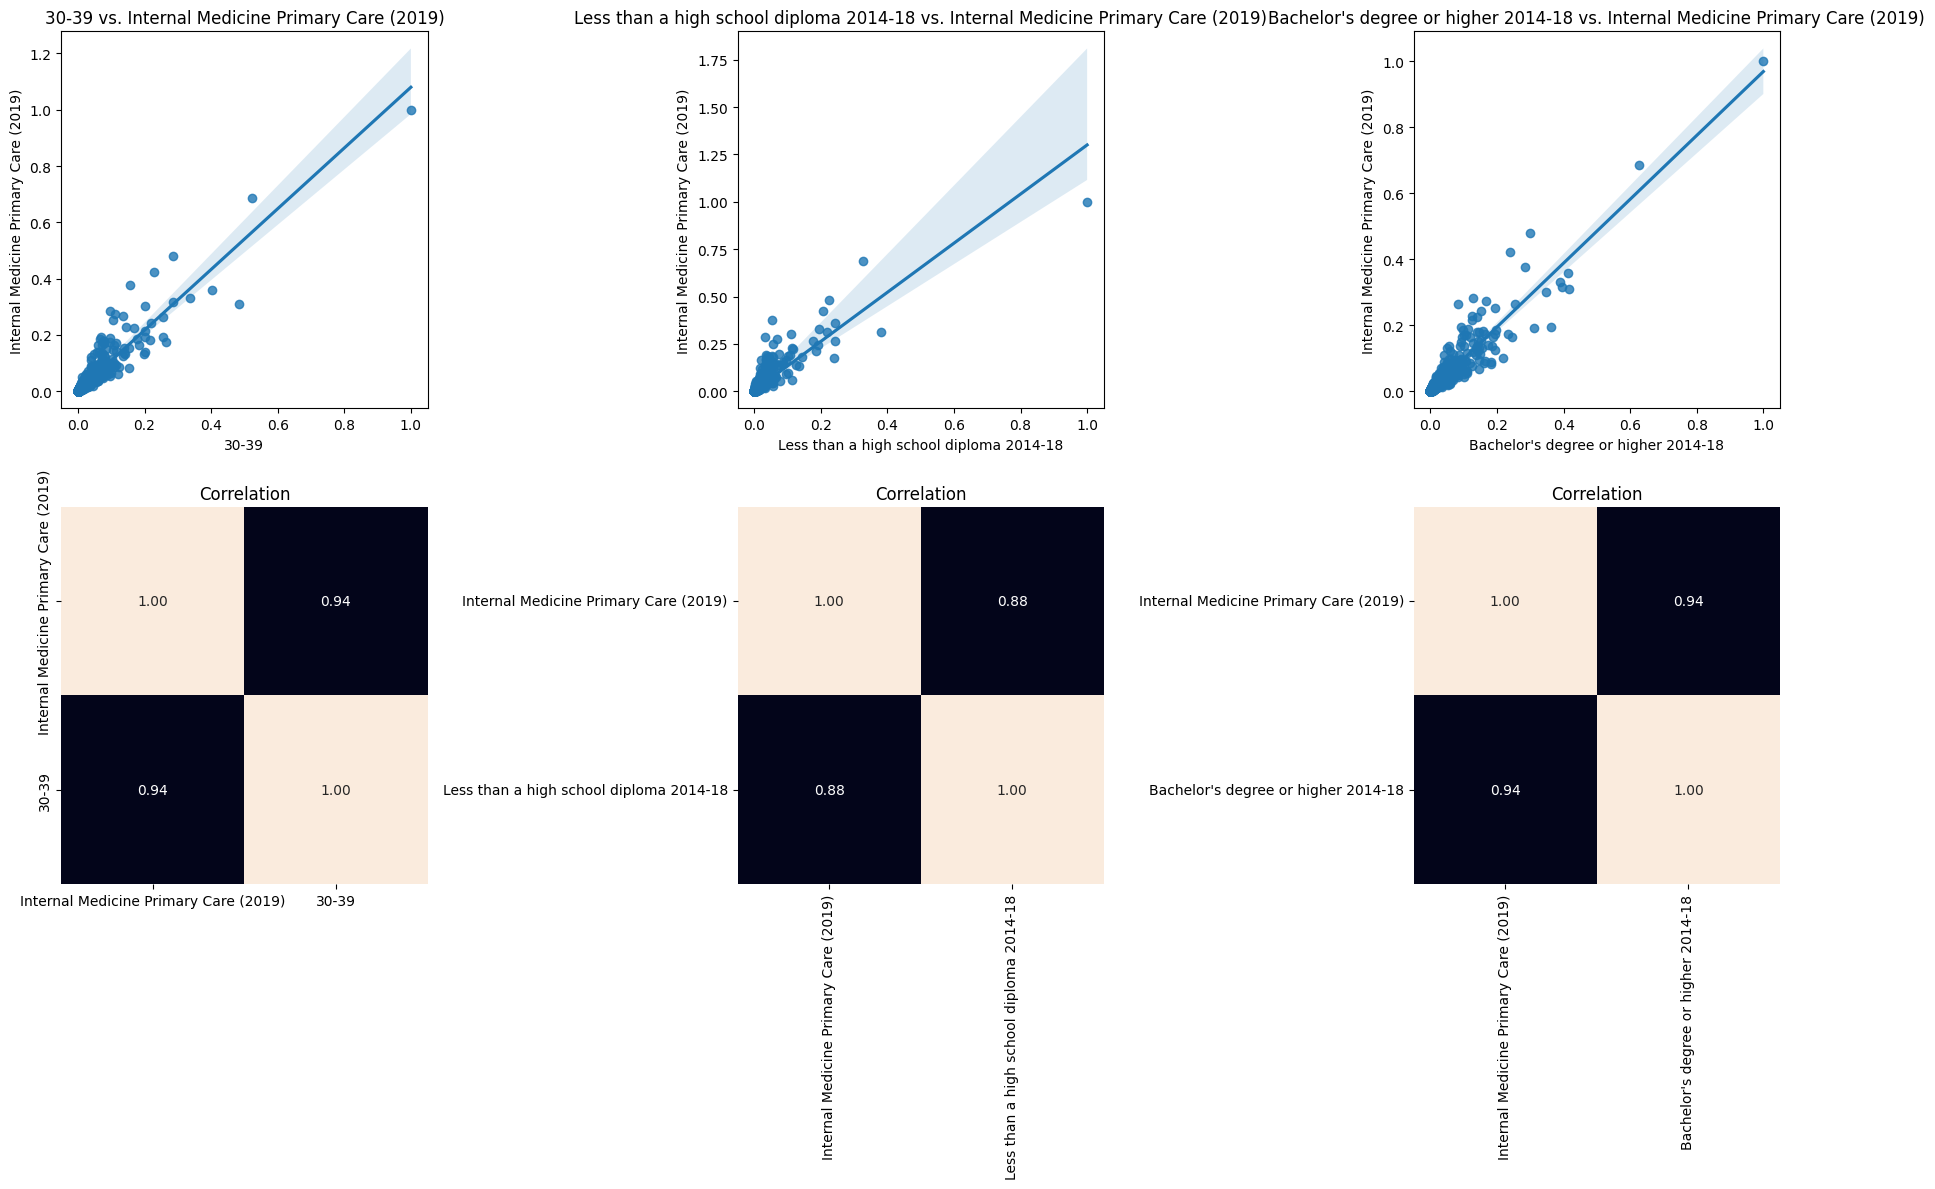

In [96]:
#utilizando un diagrama de puntos se visualizará la relación entre la variable predictora y las variables objetivo

fig, axis = plt.subplots(2, 3, figsize=(18, 12))
total_data = pd.concat([train_data, test_data])

# Scatter Plot 1
sns.regplot(data=total_data, x="30-39", y="Internal Medicine Primary Care (2019)", ax=axis[0, 0])
axis[0, 0].set_title("30-39 vs. Internal Medicine Primary Care (2019)")

# Scatter Plot 2
sns.regplot(data=total_data, x="Less than a high school diploma 2014-18", y="Internal Medicine Primary Care (2019)", ax=axis[0, 1])
axis[0, 1].set_title("Less than a high school diploma 2014-18 vs. Internal Medicine Primary Care (2019)")

# Scatter Plot 3
sns.regplot(data=total_data, x="Bachelor's degree or higher 2014-18", y="Internal Medicine Primary Care (2019)", ax=axis[0, 2])
axis[0, 2].set_title("Bachelor's degree or higher 2014-18 vs. Internal Medicine Primary Care (2019)")

# Heatmap 1
sns.heatmap(total_data[["Internal Medicine Primary Care (2019)", "30-39"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
axis[1, 0].set_title("Correlation")

# Heatmap 2
sns.heatmap(total_data[["Internal Medicine Primary Care (2019)", "Less than a high school diploma 2014-18"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[1, 1].set_title("Correlation")

# Heatmap 3
sns.heatmap(total_data[["Internal Medicine Primary Care (2019)", "Bachelor's degree or higher 2014-18"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2], cbar=False)
axis[1, 2].set_title("Correlation")

plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots

plt.tight_layout()
plt.show()

-Conclusion:

vemos q hay muy buena relacion lineal entre las variables predictoras y la objetivo

In [97]:
X_train = train_data.drop(["Internal Medicine Primary Care (2019)"], axis = 1)
y_train = train_data["Internal Medicine Primary Care (2019)"]
X_test = test_data.drop(["Internal Medicine Primary Care (2019)"], axis = 1)
y_test = test_data["Internal Medicine Primary Care (2019)"]

In [98]:
# Paso 2: Inicialización y entrenamiento del modelo¶

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [99]:
# Después del proceso de entrenamiento podemos conocer los parámetros que ha ajustado el modelo

print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 0.0008288440709687643
Coeficientes (b1, b2): [ 0.54712821 -1.04392206  0.0639677   0.87251192  0.71362535 -0.02576422
 -0.01447054]


In [100]:
# Paso 3: Predicción del modelo

y_pred = model.predict(X_test)
y_pred

array([0.0122605 , 0.00497426, 0.00175097, 0.0256841 , 0.00202263,
       0.00322224, 0.00179765, 0.00087701, 0.00134563, 0.0016824 ,
       0.00402244, 0.00144079, 0.0188899 , 0.00249645, 0.0037806 ,
       0.00414105, 0.01040373, 0.00187322, 0.00214253, 0.00152903,
       0.01308871, 0.00107431, 0.00392261, 0.01434067, 0.00140913,
       0.00109185, 0.00617048, 0.00392546, 0.00207363, 0.00160167,
       0.07451353, 0.00159742, 0.00099365, 0.01484229, 0.0124731 ,
       0.00113282, 0.04779037, 0.00317182, 0.00217166, 0.00103766,
       0.00247456, 0.01555835, 0.01925445, 0.00181414, 0.00321872,
       0.14286513, 0.00236154, 0.0015302 , 0.01148642, 0.03451389,
       0.01016432, 0.01216686, 0.00124554, 0.00484601, 0.00611011,
       0.00421759, 0.00211448, 0.00192617, 0.00126394, 0.0009944 ,
       0.03910644, 0.00760485, 0.00106667, 0.00158812, 0.03206208,
       0.00141434, 0.00338224, 0.00125227, 0.00166509, 0.05753041,
       0.00133392, 0.00231048, 0.00174244, 0.00223474, 0.00427

In [101]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 5.454719251122388e-05
Coeficiente de determinación: 0.907638500437765


## Paso 4: Construye un modelo de Lasso

In [102]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividimos el conjunto de datos en entrenamiento (train) y pruebas (test)
X = dataframe_scal.drop("Heart disease_number", axis=1)
y = dataframe_scal["Heart disease_number"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamos las características para tener una mejor convergencia
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creamos el modelo de Lasso
alpha = 1.0  # Hiperparámetro que controla la fuerza de la regularización (ajusta según tus necesidades)
lasso_model = Lasso(alpha=alpha)

# Entrenamos el modelo
lasso_model.fit(X_train_scaled, y_train)

# Evaluamos el rendimiento del modelo en los datos de prueba
score = lasso_model.score(X_test_scaled, y_test)
print("Coeficientes del modelo:", lasso_model.coef_)
print("R2 score en datos de prueba:", score)


Coeficientes del modelo: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
R2 score en datos de prueba: -0.0074844720375926155
